In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/ashrae-feather-format-for-fast-loading/train.feather
/kaggle/input/ashrae-feather-format-for-fast-loading/weather_train.feather
/kaggle/input/ashrae-feather-format-for-fast-loading/__output__.json
/kaggle/input/ashrae-feather-format-for-fast-loading/test.feather
/kaggle/input/ashrae-feather-format-for-fast-loading/weather_test.feather
/kaggle/input/ashrae-feather-format-for-fast-loading/building_metadata.feather
/kaggle/input/ashrae-feather-format-for-fast-loading/__notebook__.ipynb
/kaggle/input/ashrae-feather-format-for-fast-loading/__results__.html
/kaggle/input/ashrae-feather-format-for-fast-loading/custom.css
/kaggle/input/ashrae-feather-format-for-fast-loading/sample_submission.feather
/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/k

### I am not sure if you are noticing this, so I share this.

In [2]:
Input = Path('/kaggle/input/ashrae-feather-format-for-fast-loading')

In [3]:
lists = ['test.feather','train.feather','weather_train.feather','weather_test.feather','building_metadata.feather']
test = pd.read_feather(Input/lists[0])
train = pd.read_feather(Input/lists[1])
wtrain = pd.read_feather(Input/lists[2])
wtest = pd.read_feather(Input/lists[3])
bmeta = pd.read_feather(Input/lists[4])

/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:117: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_feather(path, columns=columns, nthreads=int_use_threads)
/opt/conda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [4]:
cm = sns.light_palette("red", as_cmap=True)

## Pearson Correlation of Weather Data.

### Air_Temperature (Pearson Corr.)

In [5]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['air_temperature'].mean()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

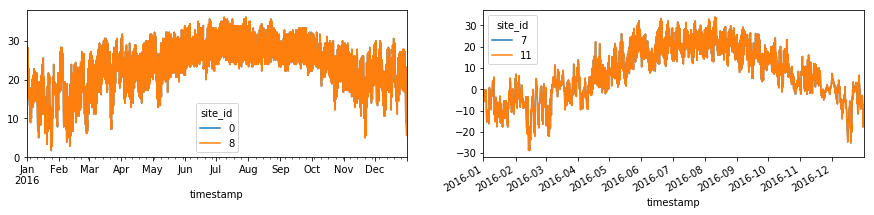

In [6]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table1 = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table1,index=['timestamp'],columns=['site_id']).air_temperature.plot(ax=ax[0])
table2 = wtrain.loc[(wtrain.site_id==7)|(wtrain.site_id==11)].set_index('site_id')
pd.pivot_table(table2,index=['timestamp'],columns=['site_id']).air_temperature.plot(ax=ax[1])

### Dew_Temperature (Pearson Corr.)

In [7]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['dew_temperature'].max()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

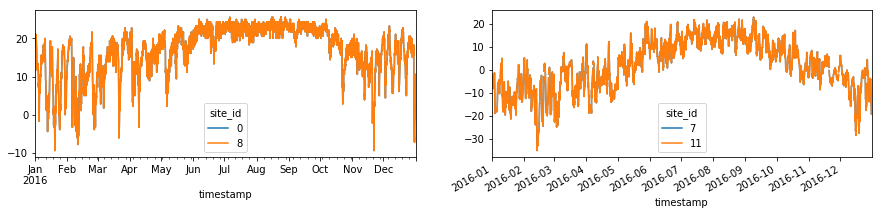

In [8]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table1 = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table1,index=['timestamp'],columns=['site_id']).dew_temperature.plot(ax=ax[0])
table2 = wtrain.loc[(wtrain.site_id==7)|(wtrain.site_id==11)].set_index('site_id')
pd.pivot_table(table2,index=['timestamp'],columns=['site_id']).dew_temperature.plot(ax=ax[1])

### Cloud_Coverage (Pearson Corr.)

In [9]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['cloud_coverage'].min()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

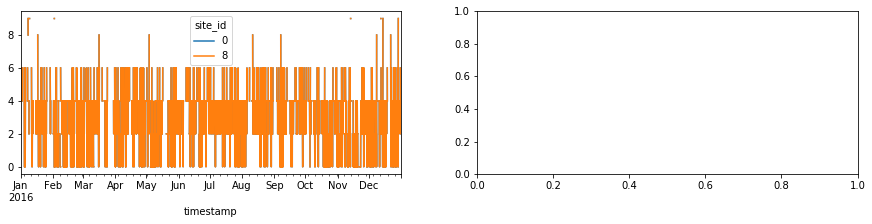

In [10]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).cloud_coverage.plot(ax=ax[0])

### Sea_Level_Pressure (Pearson Corr.)

In [11]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['sea_level_pressure'].mean()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

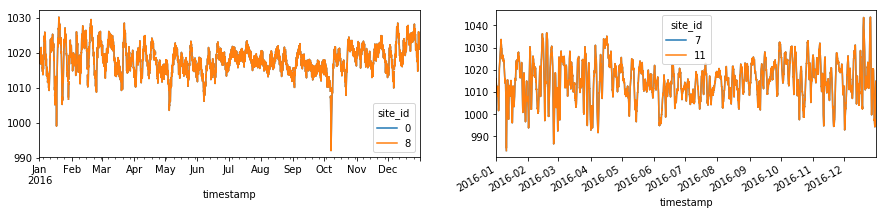

In [12]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table1 = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table1,index=['timestamp'],columns=['site_id']).sea_level_pressure.plot(ax=ax[0])
table2 = wtrain.loc[(wtrain.site_id==7)|(wtrain.site_id==11)].set_index('site_id')
pd.pivot_table(table2,index=['timestamp'],columns=['site_id']).sea_level_pressure.plot(ax=ax[1])

### Wind_Direction (Pearson Corr.)

In [13]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['wind_direction'].mean()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

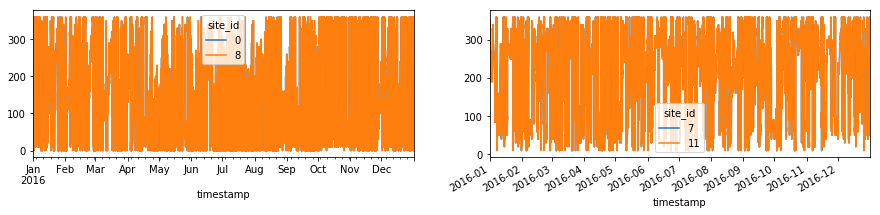

In [14]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table1 = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table1,index=['timestamp'],columns=['site_id']).wind_direction.plot(ax=ax[0])
table2 = wtrain.loc[(wtrain.site_id==7)|(wtrain.site_id==11)].set_index('site_id')
pd.pivot_table(table2,index=['timestamp'],columns=['site_id']).wind_direction.plot(ax=ax[1])

### Wind_Speed (Pearson Corr.)

In [15]:
table = wtrain.groupby(['site_id','timestamp']
               ,as_index=False)['wind_speed'].mean()
table = table.loc[(table.site_id==0)|(table.site_id==8)|(table.site_id==7)|(table.site_id==11)]
pd.pivot_table(table,index=['timestamp'],columns=['site_id']).corr(method='pearson').style.background_gradient(cmap=cm)

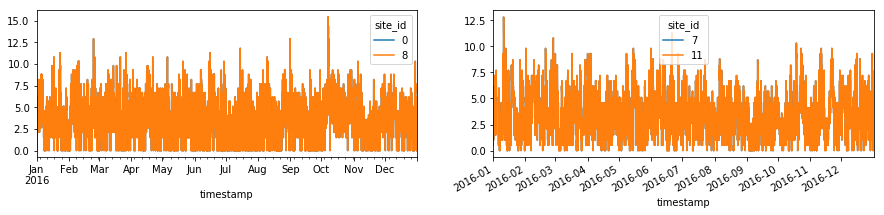

In [16]:
fig,ax =plt.subplots(1,2)
fig.set_size_inches(15, 3)
table1 = wtrain.loc[(wtrain.site_id==0)|(wtrain.site_id==8)].set_index('site_id')
pd.pivot_table(table1,index=['timestamp'],columns=['site_id']).wind_speed.plot(ax=ax[0])
table2 = wtrain.loc[(wtrain.site_id==7)|(wtrain.site_id==11)].set_index('site_id')
pd.pivot_table(table2,index=['timestamp'],columns=['site_id']).wind_speed.plot(ax=ax[1])

### Counting NaN

#### Site 0 vs Site 8

In [17]:
print('Missing Values(Site 0)')
print(wtrain.loc[wtrain.site_id==0].isnull().sum())
print('########################')
print('Missing Values(Site 8)')
print(wtrain.loc[wtrain.site_id==8].isnull().sum())

Missing Values(Site 0)
site_id                  0
timestamp                0
air_temperature          3
cloud_coverage        3830
dew_temperature          3
precip_depth_1_hr        1
sea_level_pressure      85
wind_direction         250
wind_speed               0
dtype: int64
########################
Missing Values(Site 8)
site_id                  0
timestamp                0
air_temperature          3
cloud_coverage        3830
dew_temperature          3
precip_depth_1_hr        1
sea_level_pressure      85
wind_direction         250
wind_speed               0
dtype: int64


#### Site 7 vs Site 11

In [18]:
print('Missing Values(Site 7)')
print(wtrain.loc[wtrain.site_id==7].isnull().sum())
print('########################')
print('Missing Values(Site 11)')
print(wtrain.loc[wtrain.site_id==11].isnull().sum())

Missing Values(Site 7)
site_id                  0
timestamp                0
air_temperature          0
cloud_coverage        8614
dew_temperature         23
precip_depth_1_hr     7883
sea_level_pressure       8
wind_direction           0
wind_speed               0
dtype: int64
########################
Missing Values(Site 11)
site_id                  0
timestamp                0
air_temperature          0
cloud_coverage        8614
dew_temperature         23
precip_depth_1_hr     7883
sea_level_pressure       8
wind_direction           0
wind_speed               0
dtype: int64
